In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
flight = sns.load_dataset('flights')

In [4]:
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)

In [6]:
flight['Date'] = pd.to_datetime(flight['Date'], format="%Y-%m")

ValueError: time data "1949-Jan" doesn't match format "%Y-%m", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
flight

,year,month,passengers,Date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01
...,...,...,...,...
139,1960,Aug,606,1960-08-01
140,1960,Sep,508,1960-09-01
141,1960,Oct,461,1960-10-01
142,1960,Nov,390,1960-11-01


In [ ]:
flight.set_index('Date', inplace=True)

In [ ]:
flight

,year,month,passengers
Date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121
...,...,...,...
1960-08-01,1960,Aug,606
1960-09-01,1960,Sep,508
1960-10-01,1960,Oct,461


In [ ]:
flight.drop(columns=['year', 'month'], inplace=True)

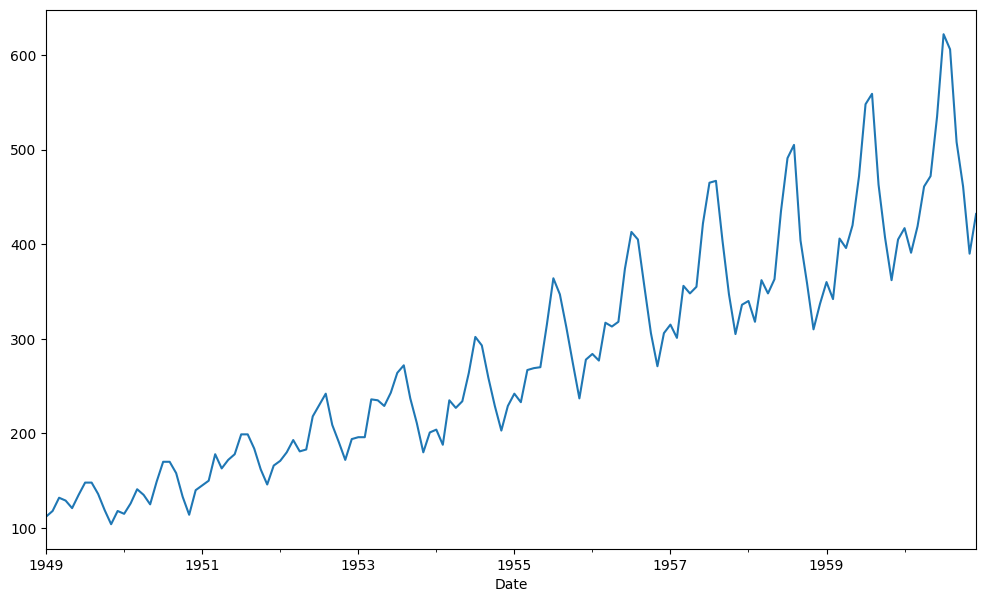

In [ ]:
flight['passengers'].plot(figsize=(12, 7));

<Axes: xlabel='Date'>

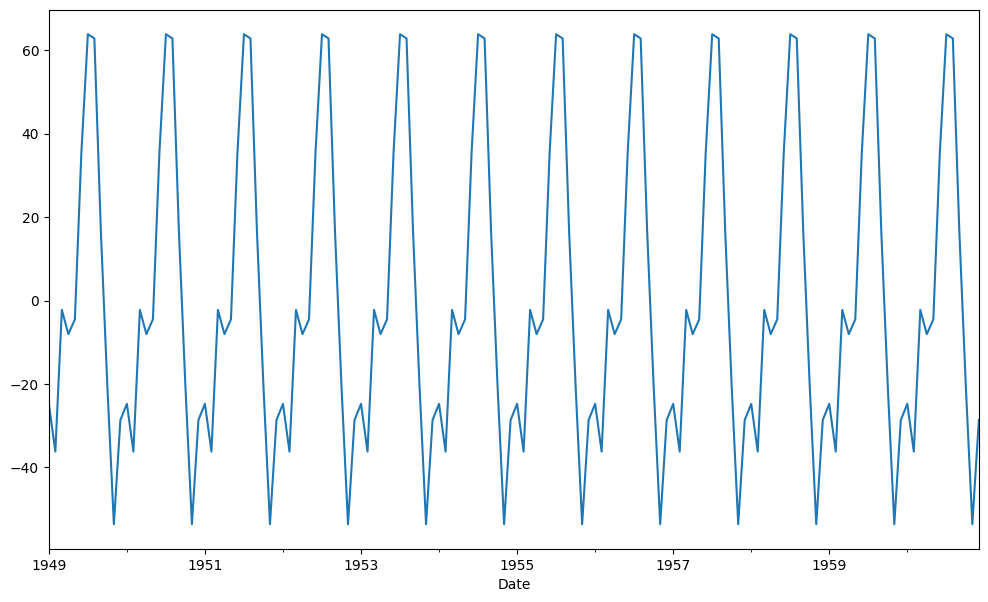

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(flight['passengers']).seasonal.plot(figsize=(12, 7))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(flight['passengers'], order=(1, 1, 3), seasonal_order=(1, 1, 3, 12)).fit()

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving av

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                       passengers   No. Observations:                  144
Model:             ARIMA(1, 1, 3)x(1, 1, 3, 12)   Log Likelihood                -502.605
Date:                          Wed, 18 Oct 2023   AIC                           1023.209
Time:                                  23:40:52   BIC                           1049.086
Sample:                              01-01-1949   HQIC                          1033.724
                                   - 12-01-1960                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8226      0.120      6.838      0.000       0.587       1.058
ma.L1         -1.2069      0.142     -8.505      0.000      -1.485      -0.929
ma.L2          0.3428      0.164      2.090      0.037       0.021       0.664
ma.L3         -0.1149      0.126     -0.912      0.362      -0.362       0.132
ar.S.L12      -0.9972      0.537     -1.858      0.063      -2.049       0.055
ma.S.L12       0.8956      1.534      0.584      0.559      -2.112       3.903
ma.S.L24       0.0102      0.235      0.043      0.965      -0.451       0.472
ma.S.L36       0.0953      0.251      0.380      0.704      -0.396       0.586
sigma2       121.5149    120.515      1.008      0.313    -114.691     357.721
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                16.94
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.55   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2032-05-01    3082.222534
Freq: MS, dtype: float64

In [ ]:
import datetime as dt
dates = pd.date_range(start='1961-01-01', end='1991-12-01', freq='MS')

In [ ]:
dates

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01',
               ...
               '1991-03-01', '1991-04-01', '1991-05-01', '1991-06-01',
               '1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01'],
              dtype='datetime64[ns]', length=372, freq='MS')

<Axes: xlabel='Date'>

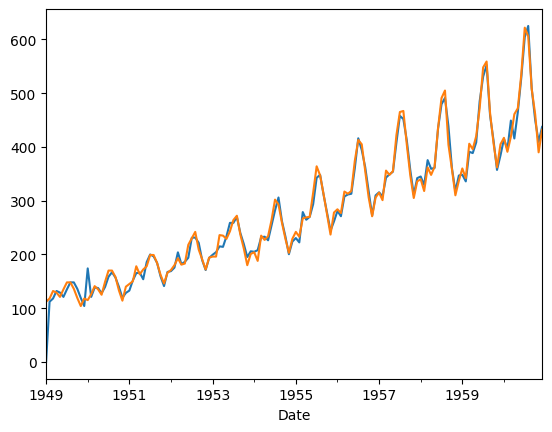

In [ ]:
model.predict().plot()
flight['passengers'].plot()

In [ ]:

forecasted_data = [model.predict(i).iloc[0] for i in range(144, 144+372)]

In [ ]:
forecasts = pd.DataFrame({'forecasted_data': forecasted_data}, index=dates)

In [ ]:
forecasts

,forecasted_data
1961-01-01,447.817208
1961-02-01,422.993862
1961-03-01,459.208574
1961-04-01,496.558079
1961-05-01,510.428148
...,...
1991-08-01,1756.556927
1991-09-01,1660.551555
1991-10-01,1611.895191
1991-11-01,1541.562903


<Axes: >

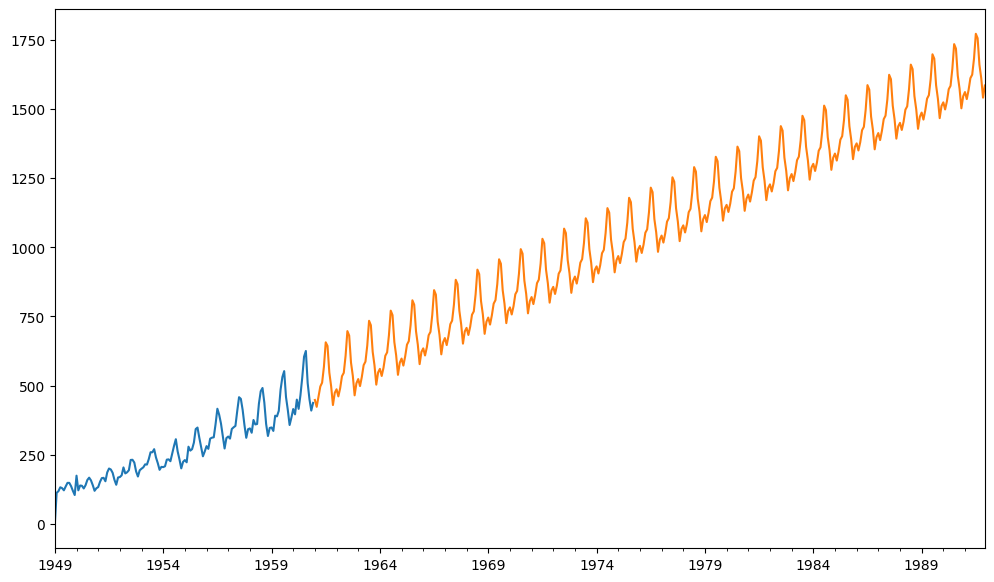

In [ ]:
model.predict().plot(figsize=(12, 7))
forecasts['forecasted_data'].plot(figsize=(12, 7))